<a href="https://colab.research.google.com/github/rupeshnerkar11/Data-Science-Projects/blob/main/D1_Disney_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disney Movies Analysis

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving disney_movies_total_gross.csv to disney_movies_total_gross.csv
User uploaded file "disney_movies_total_gross.csv" with length 33964 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


# Preprocessing

### Data Loading

In [ ]:
df = pd.read_csv('/content/disney_movies_total_gross.csv')
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


### No missing data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


### Converting Release date into datetime

In [ ]:
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df['year'] = df['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

In [ ]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [ ]:
df.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
year                                object
dtype: object

In [ ]:
df.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


# Analysing The Static Data

### Movies rating and genere

Text(0.5, 0, 'rating')

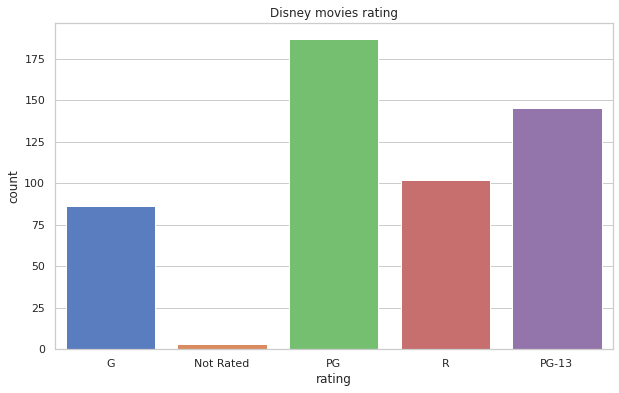

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies rating')
sns.countplot(x='mpaa_rating', data=df)
plt.xlabel('rating')

Text(0, 0.5, 'genere')

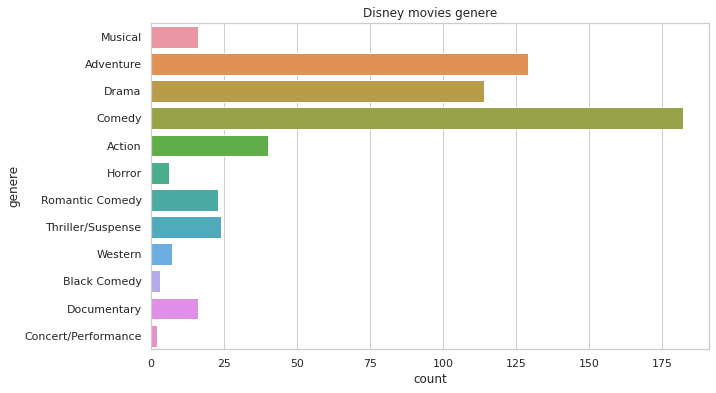

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies genere')
sns.countplot(y='genre', data=df)
plt.ylabel('genere')

# Analysis of number per year

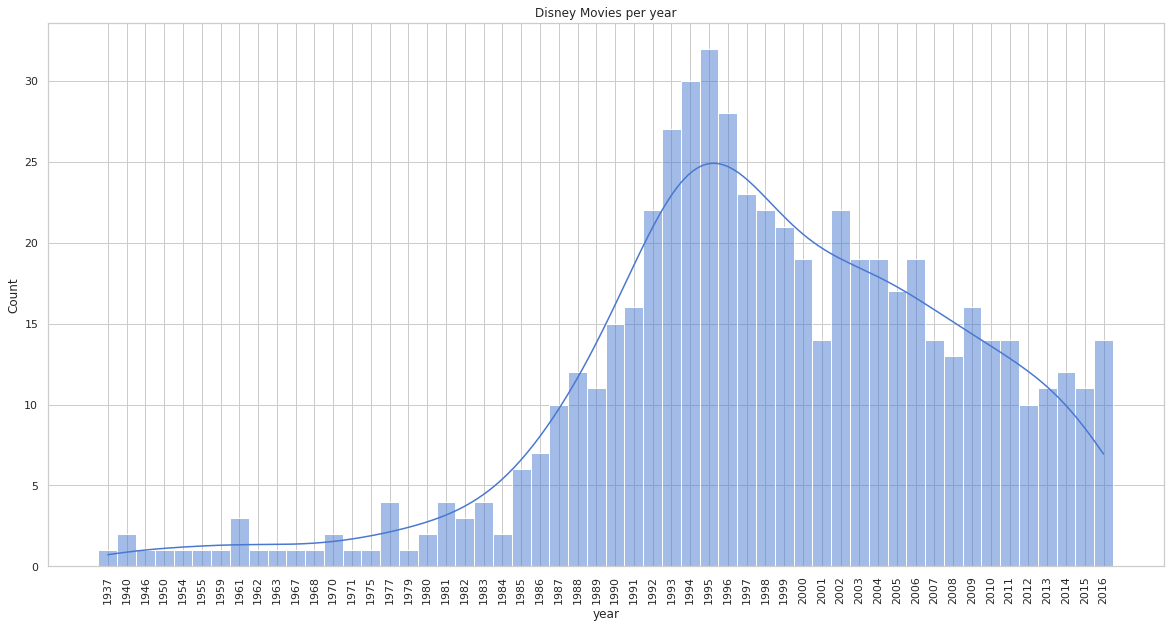

In [ ]:

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Disney Movies per year')
sns.histplot(df['year'], kde=True)


# Analysing the Gross

The value of money changes with time and it very important to analyse the gross with inflation. The gross with inflation makes it possible to analyse how they have ganed the current monetry value.

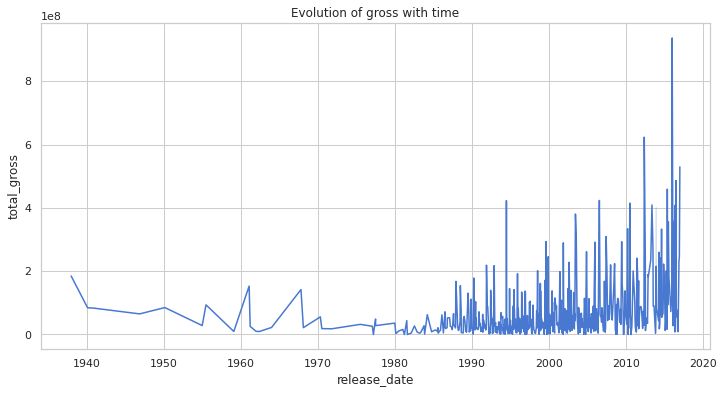

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Evolution of gross with time")
plt.xlabel('release_date')
plt.ylabel('total_gross')
sns.lineplot(x='release_date', y='total_gross', size=None, style=None, data=df)


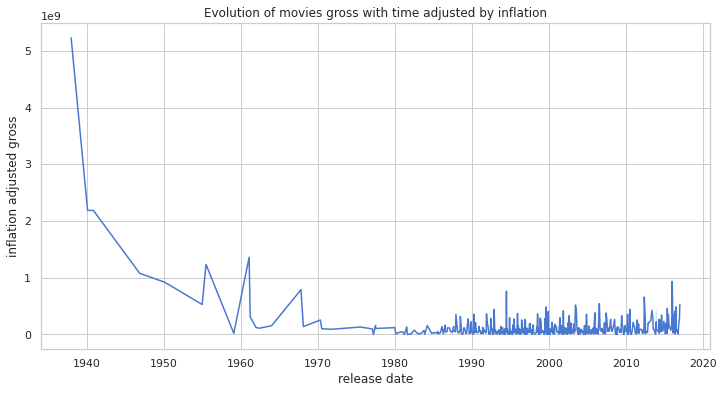

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time adjusted by inflation')
plt.xlabel('release date')
plt.ylabel('inflation adjusted gross')
sns.lineplot(x='release_date', y='inflation_adjusted_gross', data=df)

### There is clear difference in two graph which revels the True picture. 

# Analysing different parameters

In [ ]:
genre_avg= df.groupby('genre').mean()


In [ ]:
genre_avg

,total_gross,inflation_adjusted_gross
genre,,
Action,1.046141e+08,1.374734e+08
Adventure,1.270471e+08,1.903974e+08
Black Comedy,3.251440e+07,5.224349e+07
Comedy,4.461329e+07,8.466773e+07
Concert/Performance,5.172823e+07,5.741084e+07
Documentary,1.129285e+07,1.271803e+07
Drama,3.602608e+07,7.189302e+07
Horror,1.451148e+07,2.341385e+07
Musical,7.233026e+07,6.035979e+08


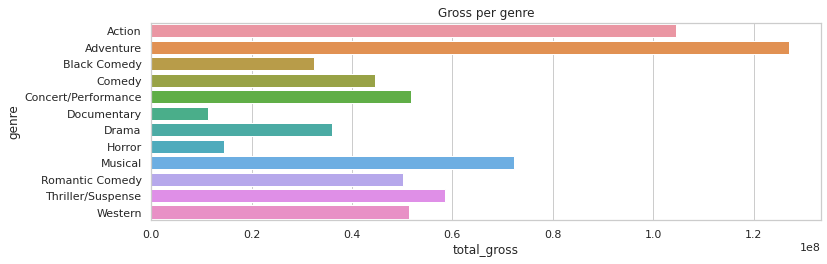

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre')
sns.barplot( x=genre_avg['total_gross'] , y=genre_avg.index )




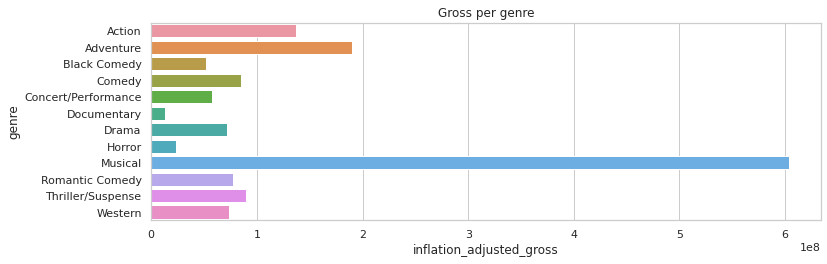

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre')
sns.barplot(x=genre_avg['inflation_adjusted_gross'] , y=genre_avg.index )

## The musical genre is having highest Gross after inflation adjustment

In [ ]:
genre_sum = df.groupby('genre').sum()
genre_sum

,total_gross,inflation_adjusted_gross
genre,,
Action,4184563282,5498936786
Adventure,16389069453,24561266158
Black Comedy,97543212,156730475
Comedy,8119619678,15409526913
Concert/Performance,103456466,114821678
Documentary,180685619,203488418
Drama,4106972970,8195804484
Horror,87068872,140483092
Musical,1157284155,9657565776


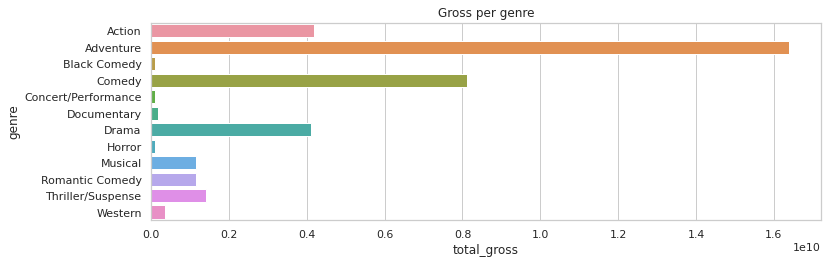

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre')
sns.barplot( x=genre_sum['total_gross'] , y=genre_sum.index )





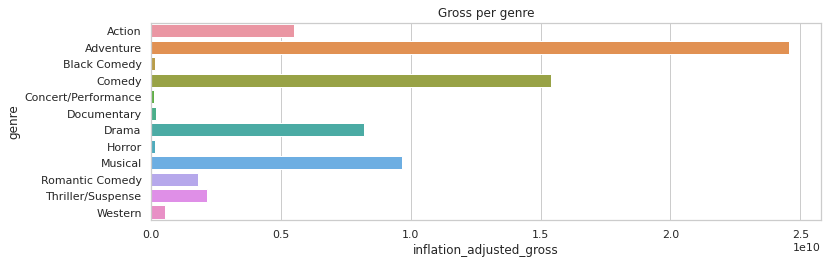

In [ ]:

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1).set_title('Gross per genre')
sns.barplot( x=genre_sum['inflation_adjusted_gross'] , y=genre_sum.index )

In [ ]:
df['genre'].value_counts()

Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   6
Black Comedy             3
Concert/Performance      2
Name: genre, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


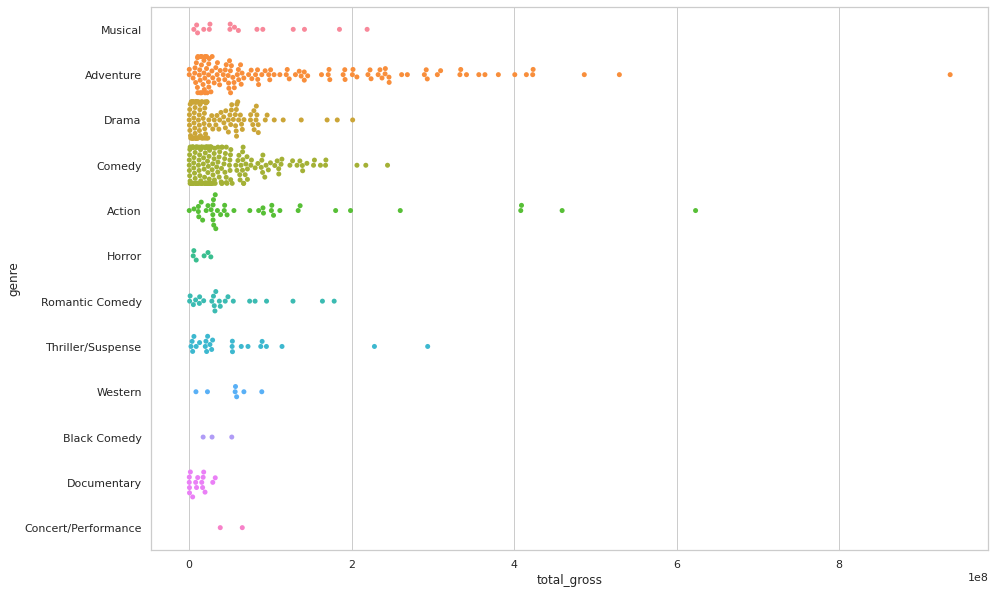

In [ ]:
plt.figure(figsize=(15,10))
sns.set_theme(style="whitegrid", palette="muted")

sns.swarmplot(data=df, x="total_gross", y="genre")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; y

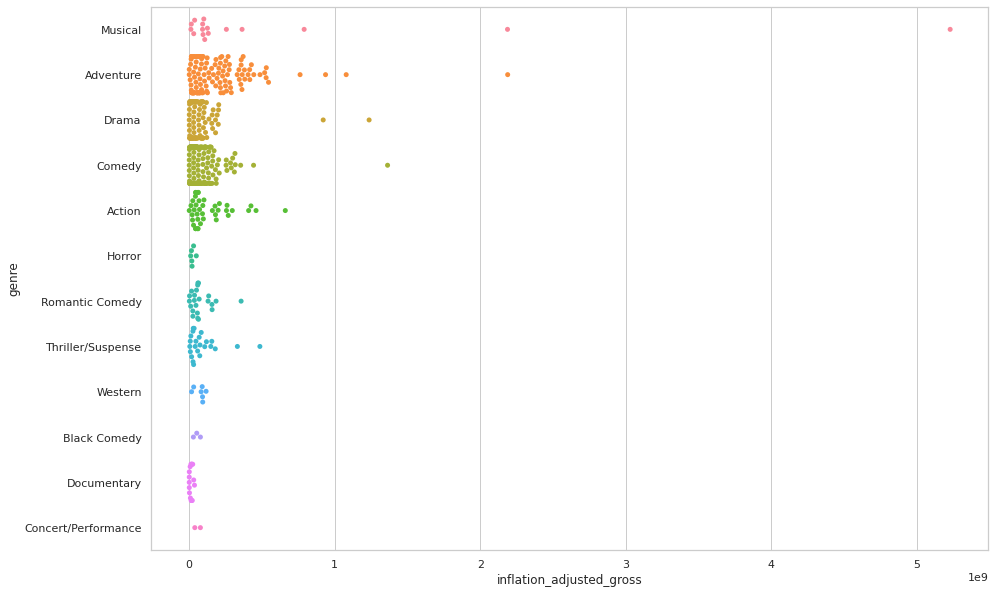

In [ ]:
plt.figure(figsize=(15,10))

sns.swarmplot(data=df, x="inflation_adjusted_gross", y="genre")

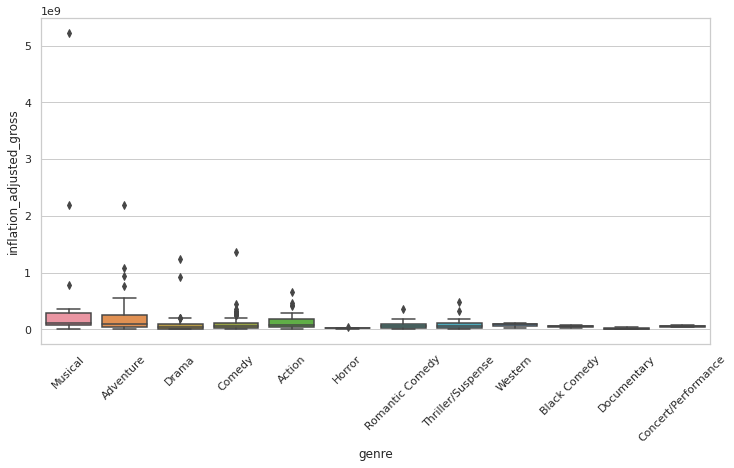

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.ylabel('inflation adjusted gross')
sns.boxplot(x='genre', y='inflation_adjusted_gross', data=df)

## Musical Genre is having outliers and Adventure genre is giving highest adjusted gross

# Analysis of ratings

### Mean of Ratings

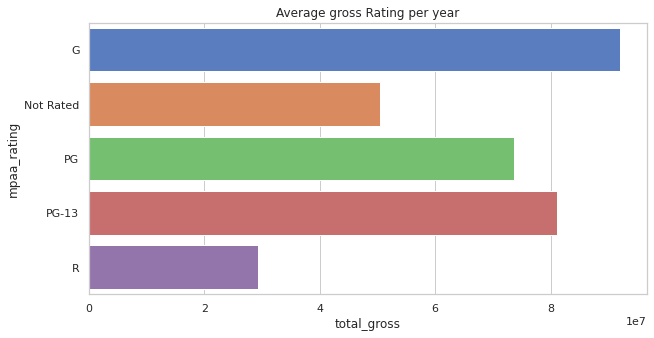

In [ ]:
rating_avg = df.groupby('mpaa_rating').mean()
plt.figure(figsize=(10, 5))

plt.title('Average gross Rating per year')
sns.barplot(x=rating_avg ['total_gross'], y=rating_avg.index)

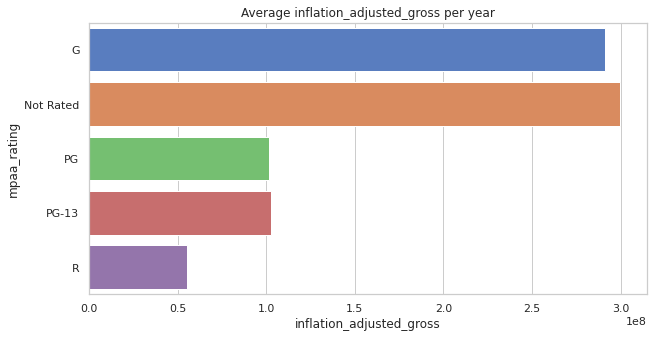

In [ ]:
rating_avg = df.groupby('mpaa_rating').mean()
plt.figure(figsize=(10, 5))

plt.title('Average inflation_adjusted_gross per year')
sns.barplot(x=rating_avg ['inflation_adjusted_gross'], y=rating_avg.index)

Sum of ratings

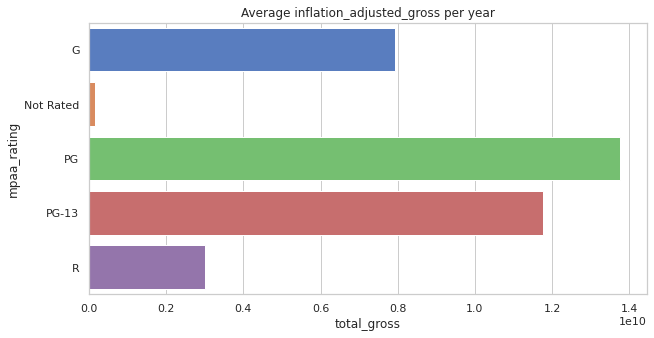

In [ ]:
rating_sum = df.groupby('mpaa_rating').sum()
plt.figure(figsize=(10,5 ))

plt.title('Average inflation_adjusted_gross per year')
sns.barplot(x=rating_sum['total_gross'], y=rating_sum.index)

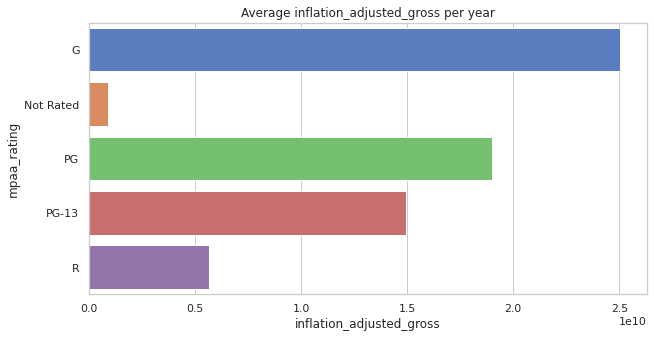

In [ ]:
rating_sum = df.groupby('mpaa_rating').sum()
plt.figure(figsize=(10, 5))

plt.title('Average inflation_adjusted_gross per year')
sns.barplot(x=rating_sum ['inflation_adjusted_gross'], y=rating_sum.index)

# Disney Movie Income Trends

In [ ]:
yearly_income = df.groupby('year').sum()

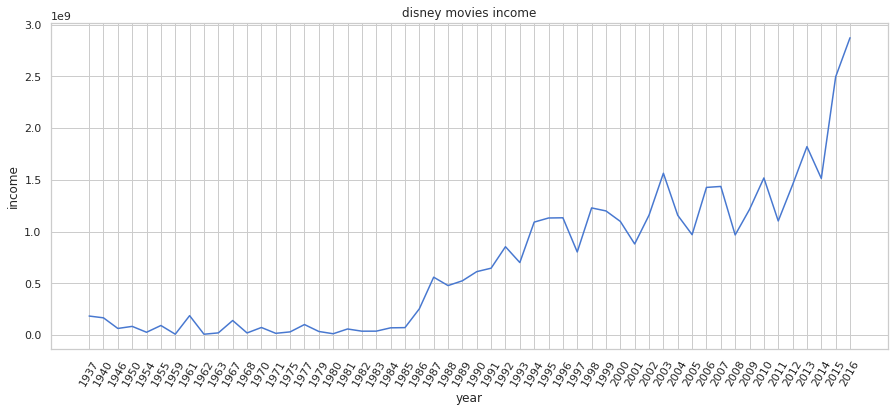

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('disney movies income')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=60)
sns.lineplot(x=yearly_income.index, y=yearly_income['total_gross'])

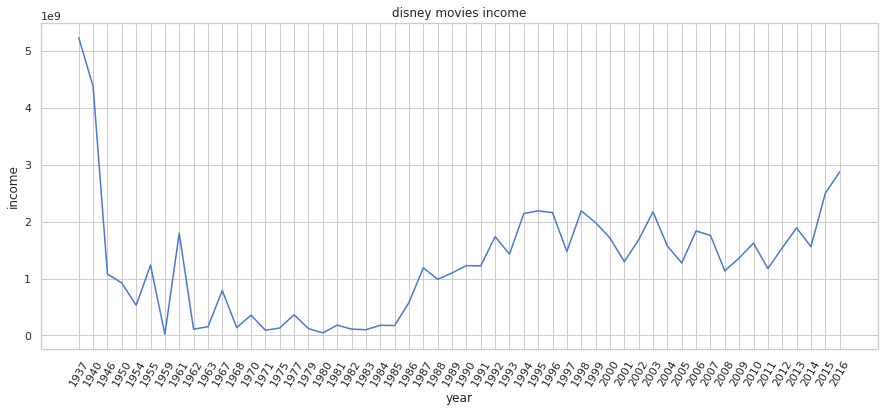

In [ ]:
plt.figure(figsize=(15, 6))
plt.title('disney movies income')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=60)
sns.lineplot(x=yearly_income.index, y=yearly_income['inflation_adjusted_gross'])

In [ ]:
df.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross', 'year'],
      dtype='object')